In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on SA1
use_SA1 = []
for k in range (len(data)):
    if data['home_team'][k] == 'SA1' and data['away_team'][k] not in ['SA1', 'SA2']:
        use_SA1.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'SA1' and data['home_team'][g] not in ['SA1', 'SA2']:
        use_SA1.append(g)
data_sa1 = data.filter(items = use_SA1, axis = 0)
data_sa1 = data_sa1.replace(to_replace = r'^AS.$', value = 'Asia', regex = True)
data_sa1 = data_sa1.replace(to_replace = r'^EU.$', value = 'Europe', regex = True)
data_sa1 = data_sa1.replace(to_replace = r'^NA.$', value = 'North_America', regex = True)
data_sa1 = data_sa1.replace(to_replace = r'^AF.$', value = 'Africa', regex = True)
print(data_sa1)

            date      home_team      away_team  year  home  away  goal_margin
533   1930-07-15            SA1         Europe  1930     1    -1            1
536   1930-07-19            SA1  North_America  1930     1    -1            3
542   1930-08-01            SA1         Europe  1930     1    -1            1
630   1934-05-27            SA1         Europe  1934    -1     1            1
632   1934-05-27            SA1         Europe  1934    -1     1            2
...          ...            ...            ...   ...   ...   ...          ...
8455  2018-11-20         Europe            SA1  2018     1    -1            1
8482  2019-03-26         Africa            SA1  2019    -1     1            1
8522  2019-06-23           Asia            SA1  2019    -1     1            2
8558  2019-09-06  North_America            SA1  2019    -1     1            1
8570  2019-10-09         Europe            SA1  2019     0     0            0

[795 rows x 7 columns]


In [4]:
sa = []
opponent = []
match_status = []
for x in range (len(data_sa1)):
    sa.append('SA1')
    if np.array(data_sa1['home_team'])[x] == 'SA1':
        opponent.append(np.array(data_sa1['away_team'])[x])
        match_status.append(np.array(data_sa1['home'])[x])
    else:
        opponent.append(np.array(data_sa1['home_team'])[x])
        match_status.append(np.array(data_sa1['away'])[x])
        
sa1 = pd.DataFrame(data = {'south_america_tier1' : sa, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_sa1['goal_margin']), 'year' : np.array(data_sa1['year'])})

print(sa1)

    south_america_tier1       opponent  match_status  goal_margin  year
0                   SA1         Europe             1            1  1930
1                   SA1  North_America             1            3  1930
2                   SA1         Europe             1            1  1930
3                   SA1         Europe            -1            1  1934
4                   SA1         Europe            -1            2  1934
..                  ...            ...           ...          ...   ...
790                 SA1         Europe            -1            1  2018
791                 SA1         Africa             1            1  2019
792                 SA1           Asia             1            2  2019
793                 SA1  North_America             1            1  2019
794                 SA1         Europe             0            0  2019

[795 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
sa1_asia = []
sa1_europe =[]
sa1_north_america =[]
sa1_africa = []

for y in range (len(sa1)):
    if opponent[y] == 'Asia':
        sa1_asia.append(y)
    elif opponent[y] == 'North_America':
        sa1_north_america.append(y)
    elif opponent[y] == 'Europe':
        sa1_europe.append(y)
    if opponent[y] == 'Africa':
        sa1_africa.append(y)
#verifying
print(len(sa1_africa) + len(sa1_asia) + len(sa1_europe) + len(sa1_north_america) )

795


In [6]:
#sa1_vs_asia 
sa1_vs_asia = sa1.filter(items = sa1_asia, axis = 0)

#sa1_vs_europe 
sa1_vs_europe = sa1.filter(items = sa1_europe, axis = 0)

#sa1_vs_north_america 
sa1_vs_north_america = sa1.filter(items = sa1_north_america, axis = 0)

#sa1_vs_africa 
sa1_vs_africa = sa1.filter(items = sa1_africa, axis = 0)

sa1_vs_asia.to_excel("Sa_Tier1_vs_Asia.xlsx", index = False)
sa1_vs_europe.to_excel("Sa_Tier1_vs_Europe.xlsx", index = False)
sa1_vs_north_america.to_excel("Sa_Tier1_vs_North_America.xlsx", index = False)
sa1_vs_africa.to_excel("Sa_Tier1_vs_Africa.xlsx", index = False)

    south_america_tier1 opponent  match_status  goal_margin  year
93                  SA1     Asia             0            0  1977
153                 SA1     Asia             0            0  1988
154                 SA1     Asia             1            3  1988
155                 SA1     Asia             1            2  1988
158                 SA1     Asia             1            1  1989
..                  ...      ...           ...          ...   ...
777                 SA1     Asia             1            3  2018
782                 SA1     Asia             1            2  2018
788                 SA1     Asia             1            2  2018
789                 SA1     Asia            -1            1  2018
792                 SA1     Asia             1            2  2019

[82 rows x 5 columns]


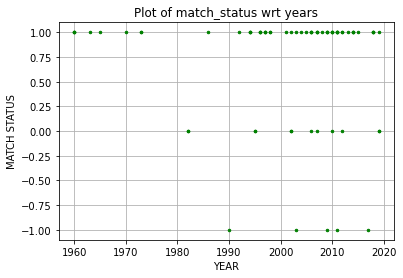

Text(0.5, 1.0, 'Histogram of match_status')

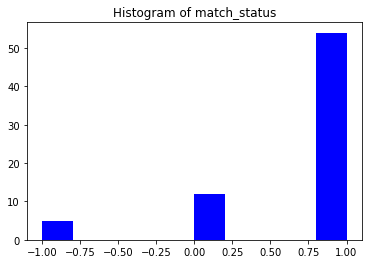

In [7]:
#checking
print(sa1_vs_asia)

#plot sa1_vs_africa
plt.plot(sa1_vs_africa['year'], sa1_vs_africa['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(sa1_vs_africa['match_status'], color = 'blue')
plt.title('Histogram of match_status')